In [4]:
import networkx as nx

# print(3*.__version__)

2.7.1


C:\Users\samir\AppData\Local\Temp\ipykernel_20740\476638618.py:81: RuntimeWarning: divide by zero encountered in long_scalars
  active_e_s = (1 / np.sum(life_time_pareto)) * 10


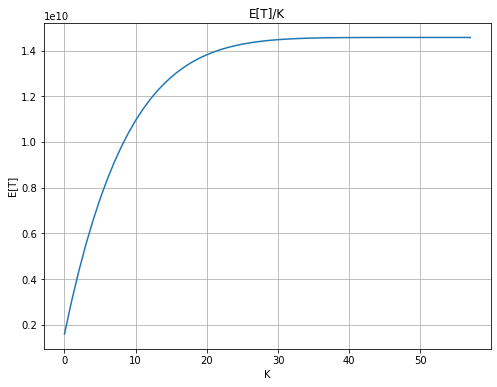

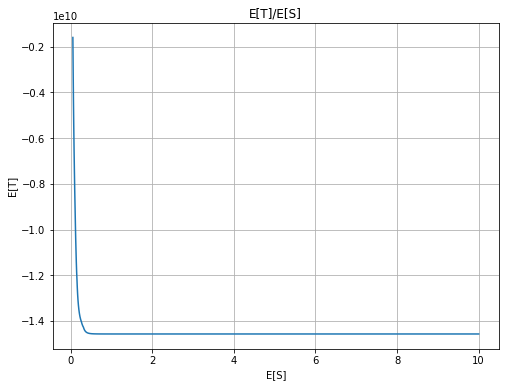

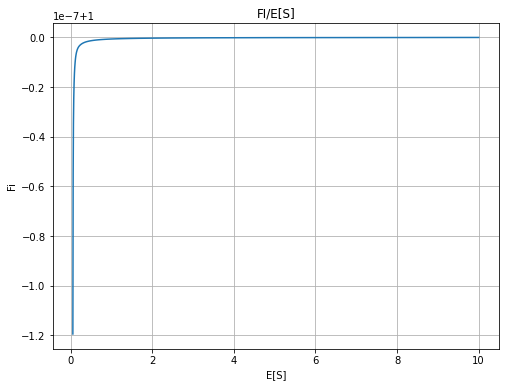

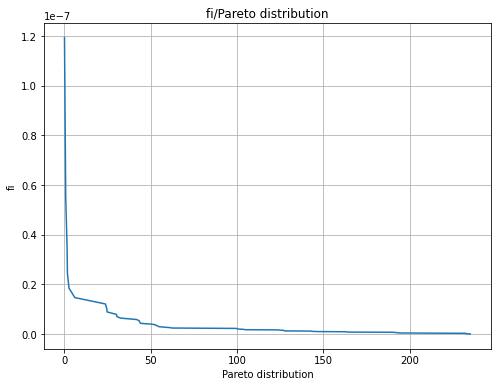

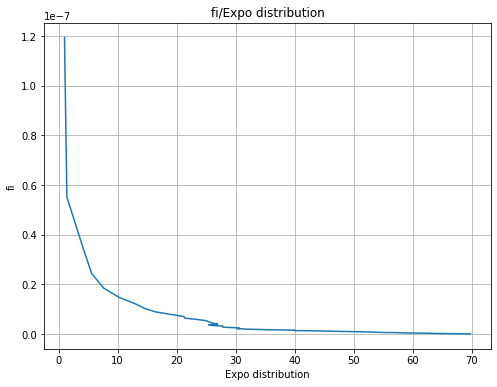

In [6]:
import math
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

erdos = nx.erdos_renyi_graph(50, 0.5)
wats = nx.watts_strogatz_graph(50, 3, 0.3)
barabasi = nx.barabasi_albert_graph(50, 3)


def random_generate(fi_list):
    pareto_random = []
    d = 0
    for j in range(len(fi_list)):
        d += np.random.pareto(1)
        pareto_random.append(d)
    normal_random = []
    s = 0
    for j in range(len(fi_list)):
        s += np.random.normal(1)
        normal_random.append(s)
    return normal_random, pareto_random


def init_calculate(network):
    life_time_pareto = []
    life_time_expo = []
    degree_a = 0
    for i in range(nx.number_of_nodes(network)):
        expo = np.random.exponential(2)
        expo_normal = np.around(expo, 3)
        life_time_expo.append(expo_normal)
        pareto = np.around(np.random.pareto(1))
        pareto_norm = int(pareto)
        life_time_pareto.append(pareto_norm)
        degree_a += network.degree[i]
    average_degree = degree_a / nx.number_of_nodes(network)
    return average_degree, life_time_pareto, life_time_expo


def active_lifetime(network):
    average_degree, life_time_pareto, life_time_expo = init_calculate(network)

    # print(len(life_time_pareto))
    # print(nx.number_of_nodes(network))
    # print(life_time_pareto[nx.number_of_nodes(network)-1])
    e_time_list = []
    e_s_list = []
    fi_list = []
    out = 0
    number_of_nodes = network.number_of_nodes()
    while True:
        fi_time = 0
        # print(network.number_of_nodes())
        for i in range(number_of_nodes):
            # print(len(life_time_pareto))
            # print(i)
            if life_time_pareto[i] > 0:
                out += (((1 + (life_time_pareto[i] - 1)) ** average_degree) - 1) / average_degree
                # print(out, average_degree)
                fi_time += life_time_pareto[i] - 1
                life_time_pareto[i] = life_time_pareto[i] - 1
            elif life_time_pareto[i] == 0:
                neighbors = list(network.neighbors(i))
                for s in neighbors:
                    random_node = random.randint(0, number_of_nodes)
                    try:
                        network.add_edge(s, random_node)
                    except:
                        pass
                # try:
                #     if sample_network.has_node(n):
                #         sample_network.remove_node()
                # except:
                #     pass

        # print(out)
        # print(active_fi_time)
        try:
            active_e_s = (1 / np.sum(life_time_pareto)) * 10
            e_s_list.append(active_e_s)
        except:
            e_s_list.append(1)
        e_time_list.append(out)
        try:
            active_out_l = fi_time / out
        except:
            active_out_l = 0
        fi_list.append(active_out_l)
        if not np.any(life_time_pareto):
            break

    normal_random, pareto_random = random_generate(fi_list)

    return e_time_list, e_s_list, fi_list, pareto_random, normal_random


def plots(e_time_list, e_s_list, fi_list, pareto_random, normal_random, network, type):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(list(range(len(e_time_list))), e_time_list)
    plt.title("E[T]/K")
    plt.ylabel('E[T]')
    plt.xlabel('K')
    ax.grid()
    # plt.savefig('phase2/' + network + '/4-1-' + type + '.png')
    plt.show()

    e_time_list_2 =[]
    for i in e_time_list:
        e_time_list_2.append(1-i)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(e_s_list, e_time_list_2)
    plt.title("E[T]/E[S]")
    plt.ylabel('E[T]')
    plt.xlabel('E[S]')
    ax.grid()
    # plt.savefig('phase2/' + network + '/4-2-' + type + '.png')
    plt.show()

    fi_list_2 =[]
    for i in fi_list:
        fi_list_2.append(1-i)

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.title("FI/E[S]")
    plt.plot(e_s_list, fi_list_2)
    plt.ylabel('Fi')
    plt.xlabel('E[S]')
    ax.grid()
    # plt.savefig('phase2/' + network + '/4-3-' + type + '.png')
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(pareto_random, fi_list)
    plt.title('fi/Pareto distribution')
    plt.ylabel('fi')
    plt.xlabel('Pareto distribution')
    ax.grid()
    # plt.savefig('phase2/' + network + '/4-4-' + type + '.png')
    plt.show()

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.title('fi/Expo distribution')
    plt.plot(normal_random, fi_list)
    plt.ylabel('fi')
    plt.xlabel('Expo distribution')
    ax.grid()
    # plt.savefig('phase2/' + network + '/4-5-' + type + '.png')
    plt.show()

active_erdos_e_time_list, active_erdos_e_s_list, active_erdos_fi_list,active_erdos_pareto_random, active_erdos_normal_random = [],[],[],[],[]

for i in range(0,1):
    active_erdos_e_time_list, active_erdos_e_s_list, active_erdos_fi_list, active_erdos_pareto_random, active_erdos_normal_random = active_lifetime(barabasi)

plots(active_erdos_e_time_list, active_erdos_e_s_list, active_erdos_fi_list,
      active_erdos_pareto_random, active_erdos_normal_random, "barbasi", "active")
